<a href="https://colab.research.google.com/github/naveen686/Ebpl-DS-Enhancing-road-safety-with-AI-driven-traffic-accident-analysis-and-prediction/blob/main/nmproject22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
!pip install streamlit
!pip install pyngrok
!pip install xgboost

from google.colab import files
uploaded=files.upload()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


Saving RTA Dataset.csv to RTA Dataset.csv


In [ ]:
df = pd.read_csv("RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
f = df.drop(columns=['ID'], errors='ignore')

# Handle missing values
df = df.dropna()
df
df.head(10)
df.columns
df.info()
df['Time']=pd.to_datetime(df['Time'])
df.loc[55:60,['Road_surface_conditions']]
df.describe()

df.duplicated()
df.duplicated().sum()
df.groupby('Accident_severity').size()
df['Cause_of_accident'].value_counts()
df.isnull()
df.isnull().any()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         2889 non-null   object
 1   Day_of_week                  2889 non-null   object
 2   Age_band_of_driver           2889 non-null   object
 3   Sex_of_driver                2889 non-null   object
 4   Educational_level            2889 non-null   object
 5   Vehicle_driver_relation      2889 non-null   object
 6   Driving_experience           2889 non-null   object
 7   Type_of_vehicle              2889 non-null   object
 8   Owner_of_vehicle             2889 non-null   object
 9   Service_year_of_vehicle      2889 non-null   object
 10  Defect_of_vehicle            2889 non-null   object
 11  Area_accident_occured        2889 non-null   object
 12  Lanes_or_Medians             2889 non-null   object
 13  Road_allignment              2889 non

<ipython-input-3-5a6fa98470af>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])
<ipython-input-3-5a6fa98470af>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']=pd.to_datetime(df['Time'])


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


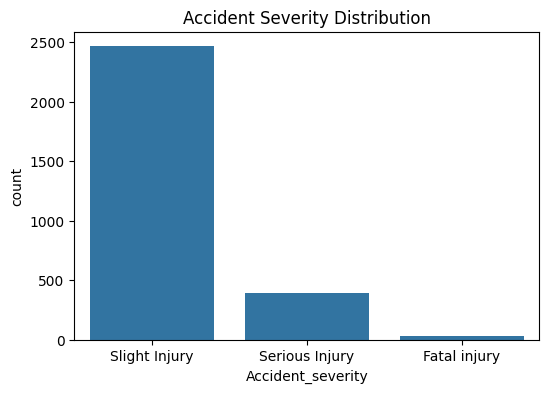

In [ ]:
# Accident severity distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Accident_severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()



<Axes: xlabel='Road_surface_conditions'>

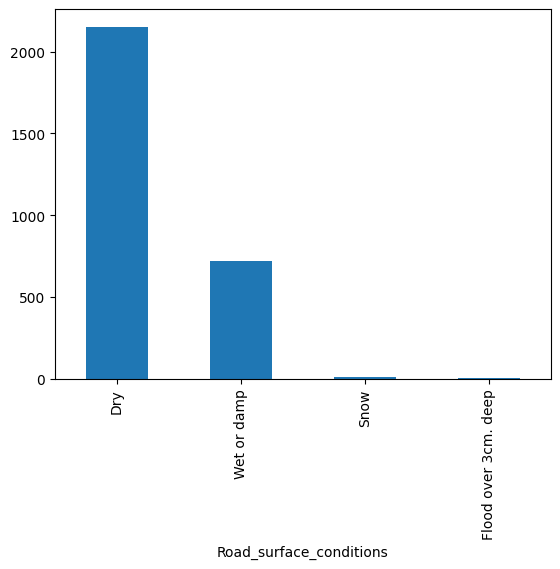

In [ ]:
df.Road_surface_conditions.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

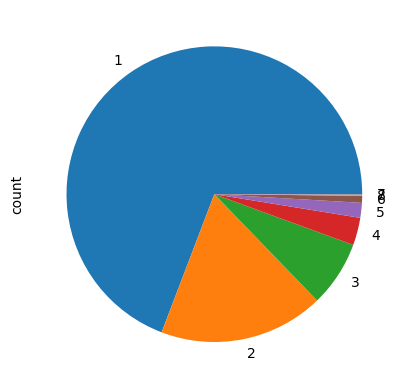

In [ ]:
df.Number_of_casualties.value_counts().plot(kind='pie')

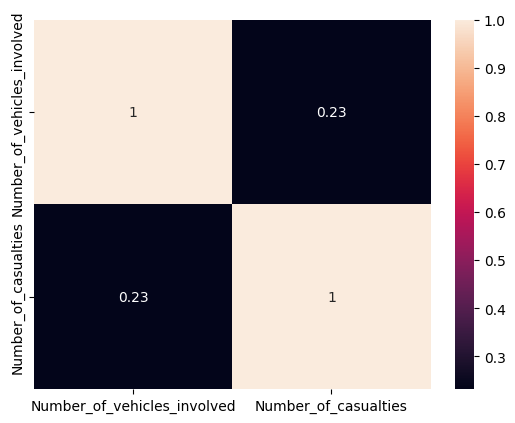

In [ ]:
correlation_matrix = df[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

<ipython-input-8-19d2a60d2986>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,y='hour',palette='rainbow')


Text(0.5, 1.0, 'hour')

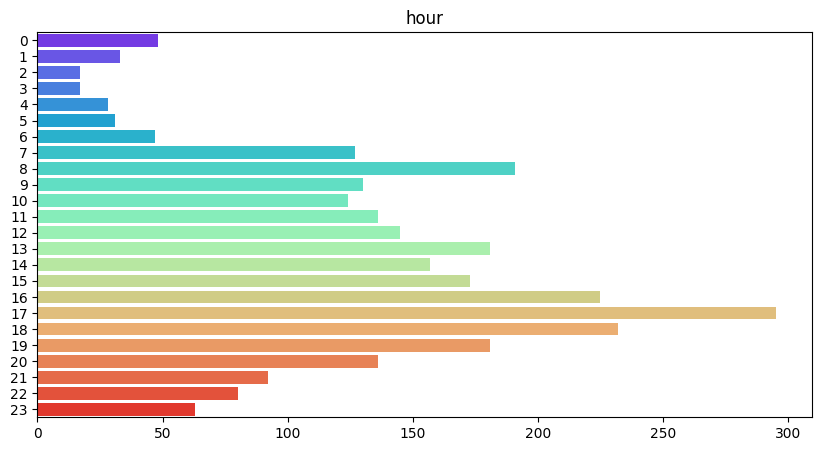

In [ ]:
df['hour']=pd.to_datetime(df['Time']).dt.hour
df['minute']=pd.to_datetime(df['Time']).dt.minute
plt.figure(figsize=(10,5))
sns.countplot(df,y='hour',palette='rainbow')
plt.xlabel('')
plt.ylabel('')
plt.title('hour')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode all categorical features using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# 2. Optional: Create new features (if applicable)
# Example: grouping time into slots (assuming 'Time_of_day' exists)
# df['Time_Slot'] = df['Time'].apply(lambda x: 'Morning' if 6 <= x <= 12 else 'Afternoon' if 13 <= x <= 17 else 'Evening' if 18 <= x <= 21 else 'Night')

# 3. Feature Selection based on correlation with target
# (Assuming target is 'Accident_severity' and it’s numeric now)
correlations = df.corr()['Accident_severity'].abs().sort_values(ascending=False)
top_features = correlations[1:11]  # Top 10 features excluding target itself

# Reduce the dataframe to top features + target
selected_features = top_features.index.tolist()
selected_features.append('Accident_severity')
df = df[selected_features]

print("Selected Features for Modeling:")
print(selected_features)

Selected Features for Modeling:
['Number_of_vehicles_involved', 'Area_accident_occured', 'Vehicle_movement', 'Number_of_casualties', 'Light_conditions', 'Weather_conditions', 'Pedestrian_movement', 'Day_of_week', 'Types_of_Junction', 'Educational_level', 'Accident_severity']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model
results = []
x=df.drop('Accident_severity',axis=1)
y=df['Accident_severity']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n")
print(results_df)



Model Comparison:

                 Model  Accuracy  F1 Score
0  Logistic Regression    0.8702    0.8099
1        Decision Tree    0.7439    0.7595
2        Random Forest    0.8495    0.8191
3              XGBoost    0.8616    0.8284


In [ ]:
y_pred = model.predict(X_test)

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve (for multiclass, optional)
# You can use OneVsRestClassifier for full ROC


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.36      0.12      0.18        67
           2       0.88      0.97      0.92       503

    accuracy                           0.86       578
   macro avg       0.75      0.41      0.44       578
weighted avg       0.82      0.86      0.83       578

Confusion Matrix:
 [[  1   0   7]
 [  0   8  59]
 [  0  14 489]]


In [ ]:
%%writefile app1.py
import streamlit as st
import numpy as np
import pickle

st.title("🚦 Traffic Accident Severity Prediction")

# Load trained model
model = pickle.load(open('model.pkl', 'rb'))

# Get user input
age = st.selectbox("Age Band of Driver", ['Under 18', '18-30', '31-50', 'Above 51'])
sex = st.selectbox("Sex of Driver", ['Male', 'Female'])
day = st.selectbox("Day of Week", ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
weather = st.selectbox("Weather Condition", ['Clear', 'Raining', 'Fog', 'Windy'])

# Encode inputs manually (must match training)
age_map = {'Under 18': 0, '18-30': 1, '31-50': 2, 'Above 51': 3}
sex_map = {'Male': 0, 'Female': 1}
day_map = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6}
weather_map = {'Clear': 0, 'Raining': 1, 'Fog': 2, 'Windy': 3}

# Create input array with dummy values for missing features
input_data = np.array([[
    age_map[age],
    sex_map[sex],
    day_map[day],
    weather_map[weather],
    0, 1, 0, 1, 2, 1  # Dummy values for missing 6 features
]])

if st.button("Predict"):
    prediction = model.predict(input_data)
    severity = ['Fatal Injury', 'Serious Injury', 'Slight Injury']
    st.success(f"Predicted Accident Severity: {severity[prediction[0]]}")
    from pyngrok import ngrok

# Kill existing tunnels
ngrok.kill()

# Start Streamlit in background
# get_ipython().system_raw('streamlit run app.py &')

# Connect to ngrok
public_url = ngrok.connect(port='8501')
print("Streamlit App URL:", public_url)


Writing app1.py


In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))


In [ ]:
!streamlit run app1.py &






  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.112.204:8501

  Stopping...
